In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.shape

(31962, 3)

In [4]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
df.drop(columns=['id'],inplace=True)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [7]:
df.isna().sum()

label    0
tweet    0
dtype: int64

In [8]:
df.duplicated().sum()

2432

In [9]:
df = df.drop_duplicates(keep='first')
df.shape

(29530, 2)

In [10]:
df.rename(columns = {'label':'target'},inplace=True)
df.head()

,target,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [11]:
df.target.unique()

array([0, 1], dtype=int64)

## EDA

0    27517
1     2013
Name: target, dtype: int64


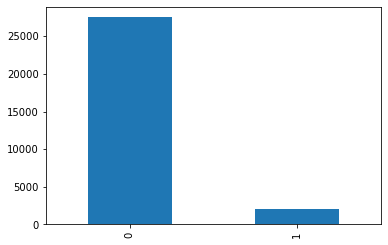

In [12]:
print(df.target.value_counts())
df.target.value_counts().plot(kind='bar')
plt.show()

0    93.183204
1     6.816796
Name: target, dtype: float64


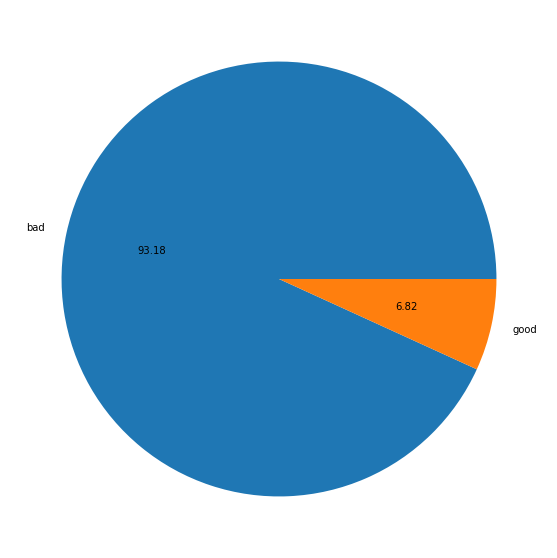

In [13]:
print(df.target.value_counts()/df.target.count()*100)
plt.figure(figsize=(15,10))
plt.pie(df['target'].value_counts(),labels=['bad','good'],autopct='%0.2f')
plt.show()

<b> It shows data is imbalanced

## Data Preprocessing

In [14]:
!pip install nltk

In [15]:
import nltk

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
# List of stop words in English
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [19]:
def transform_text(text):
    text = text.lower() # Lowercasing
    text = nltk.word_tokenize(text) # Tokenization
    text = re.sub("[^a-zA-Z]", " ", str(text)) # Remove non-letters   If this error 'expected string or bytes-like object' occurs then replace re.sub("[^a-zA-Z]", " ", text) with re.sub("[^a-zA-Z]", " ", str(text))
    text = text.translate(str.maketrans('','', string.punctuation)) # Remove punctuation
    text = re.sub(' +', ' ',text) # Remove extra space
    text = text.strip() # remove whitespaces
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")]) # Remove stop words
    text = ' '.join([ps.stem(word) for word in text.split()]) # OR ' '.join([lemma.lemmatize(word) for word in text.split()])
    
    return text

In [20]:
df['tweet'] = df['tweet'].apply(transform_text)

In [21]:
# Handling imbalanced dataset

from sklearn.utils import resample
train_majority = df[df.target==0]
train_minority = df[df.target==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['target'].value_counts()

1    27517
0    27517
Name: target, dtype: int64

In [22]:
train_upsampled['tweet'][0]

'user father dysfunct selfish drag kid dysfunct run'

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                    train_upsampled['target'],random_state = 0)

In [30]:
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.9617829844988928